In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

Loading MNIST data from keras .dataset

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")
# x_train( 60k images of 28*28 dimention) Pixel values range from 0 to 255.
# y_train: digit labels (integers in range 0-9)

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


Image Dimention -> 28 X 28 <br>
Grayscale image -> 1 channel

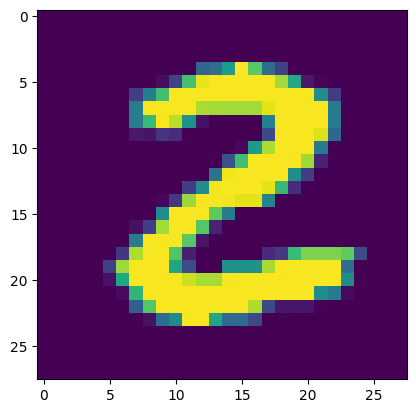

2


In [6]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#printing corresponding label
print(y_train[25])

Image Labels

In [7]:
#unique values in Y_rain
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimension in this dataset, if not then convert it into same dimention to provide it to neural network

In [8]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [9]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [10]:
# print(x_train[10])
# plt.imshow(x_train[10])
# x_train[:5]
# shape=x_train.reshape(-1 ,)
# shape

#Bulding Neural Network

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#train neural network

In [13]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6490 - loss: 1.2085 - val_accuracy: 0.9063 - val_loss: 0.3319
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9061 - loss: 0.3226 - val_accuracy: 0.9198 - val_loss: 0.2708
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9242 - loss: 0.2678 - val_accuracy: 0.9330 - val_loss: 0.2287
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9329 - loss: 0.2335 - val_accuracy: 0.9399 - val_loss: 0.2076
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9396 - loss: 0.2101 - val_accuracy: 0.9447 - val_loss: 0.1881
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9451 - loss: 0.1902 - val_accuracy: 0.9488 - val_loss: 0.1761
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9498 - loss: 0.1712 - val_accuracy: 0.9521 - val_loss: 0.1636
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9516 - loss: 0.1671 - 

<Axes: >

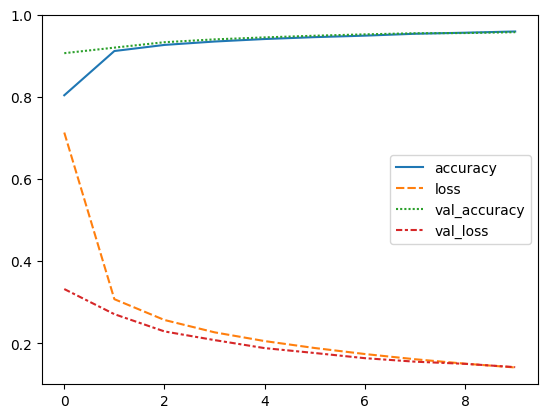

In [18]:
import seaborn as sns
sns.lineplot(model.history.history)

### Alternative Plot below for more details

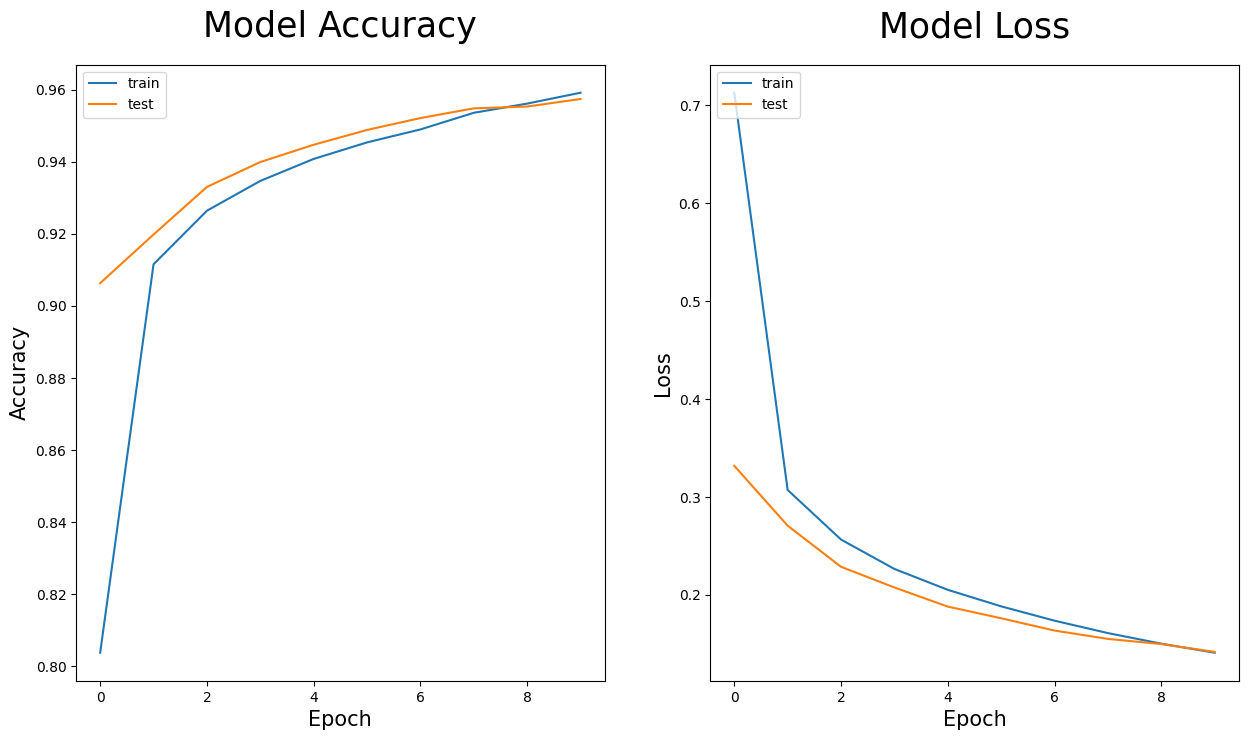

In [15]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[15,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluation

In [16]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.1643


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


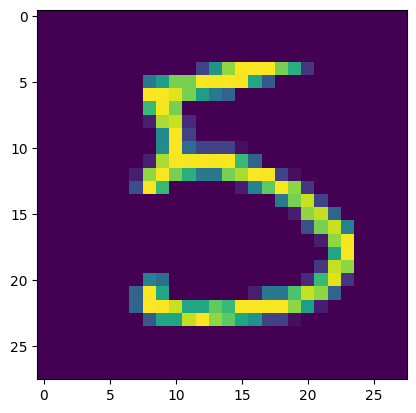

5


In [17]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))